---


<img width=25% src="https://raw.githubusercontent.com/gabrielcapela/credit_risk/main/images/myself.png" align=right>

# **Credit Risk Assessment Project**

*by Gabriel Capela*

[<img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>](https://www.linkedin.com/in/gabrielcapela)
[<img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white" />](https://medium.com/@gabrielcapela)

---

This project aims to develop a **Machine Learning model capable of predicting the probability of customer default** at the time of a credit card application, even before any payment history is available.

Default prediction is critical to minimize financial losses, preserve institutional credibility, and provide fair and efficient access to credit. However, the task is challenging due to limited data at the application stage, potential classification errors (false positives/negatives), and the need for representative historical data.

The ultimate goal is to provide financial institutions with a **data-driven decision-support tool** that improves the accuracy and fairness of credit approval processes.



<p align="center">
<img width=50% src="https://raw.githubusercontent.com/gabrielcapela/credit_risk/main/images/first_image.png">
</p>

eeedit --->
The CRoss Industry Standard Process for Data Mining ([CRISP-DM](https://www.ibm.com/docs/pt-br/spss-modeler/saas?topic=dm-crisp-help-overview)) methodology will be used to **guide** the stages of this project. In this project **supervised machine learning** algorithms (xxx e yyy) will be used to predict the probability of customer default.

The process begins with the **Business Understanding** stage, where the business objective of minimizing losses through more accurate credit decisions is understood. Next, in the **Data Understanding** stage, the available data — originally from Nubank and released by Academia Sigmoidal — is explored to assess quality, identify patterns, and understand the relationship between resources and default risk, obvious modifications will already be made. In **Data Preparation**, the data is then cleaned, transformed, and prepared for modeling. In the **Modeling** stage, the models are trained and evaluated using appropriate metrics, taking into account class imbalance. Once the best model is selected and calibrated, its performance is reviewed in the **Evaluation** stage. Finally, in the **Deployment** stage, the model will be deployed in a web application for the project, in order to provide the probability of default of a given customer, given their data.

This notebook will cover the **first three phases** of the project: Business Understanding, Data Understanding and Data Preparation.

# Business Understanding

## Problem Contextualization

One of the biggest concerns for banks, financial institutions and fintechs is the **default rate** of their customer portfolio. Granting credit involves significant risks and can directly impact the financial health of the institution.

**Assessing whether a customer has a high probability of becoming a defaulter** is essential to minimize losses and ensure the sustainability of the company. The term *default* is used to indicate the failure to comply with financial obligations, such as loan payments and credit card bills. Typically, the main reason for non-compliance with payment terms is the customer's financial inability.

Large financial institutions have invested in Machine Learning models to predict default and optimize credit granting. Nubank, one of the largest fintechs in the world and the largest in Latin America, stands out for its digital business model, lack of bureaucracy and strong focus on innovation. The company has revolutionized the banking sector by using cutting-edge technology to offer accessible and personalized financial services.

This project seeks to **develop a predictive model capable of estimating the probability of default** at the time of credit card application, before any payment history is established.

## About Nubank and the Source of Data

<p align="center">
<img width=70% src="https://raw.githubusercontent.com/gabrielcapela/credit_risk/main/images/nubank.jpg">
</p>

The data used in this project comes from a competition promoted by the startup, whose objective was to identify talents in the area of ​​Data Science. [Nubank](https://building.nubank.com.br/pt-br/data-science-machine-learning-pt-br/) is widely recognized for its **intensive use of Machine Learning and Artificial Intelligence to optimize its operations**, including credit granting. Since its founding, the company has adopted innovative data-based solutions to make access to credit safer and more efficient.

This dataset was later organized and made available by [Academia Sigmoidal](https://sigmoidal.ai), a platform specialized in teaching Data Science. This data contains detailed **information about customers at the time of credit card application** and its use allows exploring real challenges faced by the financial sector, providing an ideal scenario for the construction of **predictive models aimed at credit risk assessment**.

## Importance of the Problem

**IMPACT OF DEFAULT**

Default can affect several aspects of the financial institution, including:

- An increase in the provision for doubtful accounts, reducing the institution's profitability.
- Deterioration of the credit portfolio, harming credibility with investors and regulators.
- Impact on interest rates applied to customers, making credit more expensive for everyone.

Granting credit involves inherent risk, and incorrect decisions can result in:

*   **Financial losses**: Approving credit for customers with a high probability of default may result in substantial losses.

*   **Missed opportunities**: Denying credit to low-risk customers (false positives) can reduce the customer base and impact revenue.

*   **Customer experience**: Decisions must be fair and transparent to avoid frustration and maintain strong customer relations.

The model must balance these factors, minimizing losses and optimizing credit allocation without compromising customer base growth.

**KEY CHALLENGES AND LIMITATIONS**

- Limited data at the time of application: Since predictions are made before the credit is granted, there is no available information on the customer’s future payment behavior.
- False positives and false negatives: Rejecting a reliable customer or approving a defaulter customer can have financial and reputational impacts.
- Data quality and representativeness: It is essential to ensure that historical data accurately reflects the target audience and current market conditions.

## Project Objective

### To **create a Machine Learning model** that estimates the **probability of a customer not fulfilling their financial obligations**. The ultimate goal is to provide financial institutions with a data-driven decision-support tool that improves the accuracy and fairness of credit approval processes.

## Criteria for Model Evaluation

To ensure that the model is useful in practice, it is essential to define metrics that effectively evaluate its performance. Since the problem involves predicting default, it can be treated as a binary classification (defaulting vs. not defaulting). In addition, the model will return the probability of a user being in default or not.

Example:

User 001A, after having his data inserted into the model, had the following output:

--- 
NOT in default

65% chance of not being in default

35% chance of being in default

---

The following metrics will be used:

### F1-Score

The F1-Score is a crucial metric for classification problems with imbalanced classes, as is the case in this dataset, where there are many more non-defaulting user entries than defaulting users.

This metric is calculated with the harmonic mean of two other metrics, precision and recall:


- **Precision**: Ratio between the number of correctly detected defaulting users and the number of users detected as defaulting, whether or not this is correct. Increasing this rate seeks to minimize false positives, i.e., to prevent many non-defaulting customers from being wrongly identified as defaulting.

- **Recall**: Ratio between the number of correctly detected defaulting users and the number of users who are actually defaulting, whether detected or not. Increasing this rate seeks to minimize false negatives, i.e., to ensure that the majority of defaulting customers are correctly identified.


#### These metrics are important because, in a credit granting context, errors in both directions can have significant economic impacts.

For this project, an **F1-Score above 0.7** will be considered satisfactory.

### Log Loss (Logarithmic Loss)

Log Loss is the ideal metric to evaluate the **calibration of the probabilities returned by the model**. It penalizes more heavily the wrong predictions with high confidence, that is, when the model is very certain of a prediction and it is wrong, the error will be greater. Since the model returns probabilities, Log Loss measures how well these probabilities reflect reality.

For example, if the model predicts a 90% chance that a user will default, but the user ends up not defaulting, **the penalty will be high**. More moderate predictions, such as 50% for a class, **will have a lower penalty**, even if the user does not belong to that class.

The lower the Log Loss, the better the model is at predicting accurate probabilities.

#### Such a metric will be crucial to our final objective, which is to indicate the probability of a customer being in default, and not just to indicate whether or not he will be in default, as a yes or no.

Typical values: Log Loss ranges from 0 to infinity, with lower values ​​indicating better performance. In default prediction contexts, a Log Loss below 0.5 is often targeted, although this can vary depending on the complexity of the model and the nature of the data.

For this project, a **Log Loss below 0.4** will be considered satisfactory.

# Data Understanding

This step is essential for gaining initial insights into the dataset, **identifying patterns**, **detecting anomalies**, and **assessing data quality**. In this step, we begin to explore the characteristics of the available data, which helps shape strategies for data preparation and modeling. A thorough **Exploratory Data Analysis (EDA)** provides the foundation for making informed decisions throughout the rest of the project.

The dataset used can be downloaded from this [page](https://github.com/gabrielcapela/credit_risk/blob/main/data/acquisition_train.csv) and includes several quantitative and categorical variables for each customer, as well as **a binary variable indicating whether the customer is a defaulter or not**.

This section will be divided into eight steps: Load and inspect the dataset, Check for missing values, Univariate analysis, Multivariate analysis, Outliers and Compare target vs. feature relationships.

## Load and inspect the dataset

First, let's import the necessary packages and the dataset and check its first few lines.

In [66]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Importing the dataset
df = pd.read_csv('https://github.com/gabrielcapela/credit_risk/blob/main/data/acquisition_train.csv?raw=true')
pd.set_option('display.max_columns', None)  #Show all the columns
#Showing the first lines
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Below is the meaning of each variable:

* **ids**: unique customer identifier.  
* **target_default**: the target variable, indicates whether the customer has failed to pay a debt.  
* **score_1**: encrypted customer score from a credit or risk assessment system.  
* **score_2**: another encrypted credit or risk score.  
* **score_3**: numerical credit or risk score..  
* **score_4**: another credit or risk score.  
* **score_5**: another credit or risk score.    
* **score_6**: another credit or risk score.    
* **risk_rate**: risk rate assigned to the customer.  
* **last_amount_borrowed**: amount borrowed in the customer's last loan.  
* **last_borrowed_in_months**: number of months since the last loan was taken.  
* **credit_limit**: customer's credit limit.  
* **reason**: encrypted reason provided for the credit request.  
* **income**: estimated or reported anual customer income.  
* **facebook_profile**: indicates whether the customer has a Facebook profile (boolean).  
* **state**: encrypted customer’s state of residence.  
* **zip**: encrypted customer’s postal code.  
* **channel**: encrypted channel used by the customer to apply.  
* **job_name**: encrypted customer’s job title or occupation.  
* **real_state**: encrypted indicates property ownership or housing status.  
* **ok_since**: number of months the customer has had a relationship with the company.  
* **n_bankruptcies**: number of past bankruptcies.  
* **n_defaulted_loans**: number of previously defaulted loans.  
* **n_accounts**: total number of customer accounts.  
* **n_issues**: number of recorded issues or complaints.  
* **application_time_applied**: timestamp of the loan application.  
* **application_time_in_funnel**: time spent by the customer in the approval funnel.  
* **email**: customer email provider.  
* **external_data_provider_credit_checks_last_2_year**: number of credit checks in the last two years.  
* **external_data_provider_credit_checks_last_month**: number of credit checks in the last month.  
* **external_data_provider_credit_checks_last_year**: number of credit checks in the last year.  
* **external_data_provider_email_seen_before**: number of email has been seen before by external providers.  
* **external_data_provider_first_name**: first name from an external provider (possibly anonymized).  
* **external_data_provider_fraud_score**: fraud risk score provided by an external source.  
* **lat_lon**: customer’s geographic coordinates.  
* **marketing_channel**: marketing channel through which the customer was acquired.  
* **profile_phone_number**: phone number associated with the customer profile.  
* **reported_income**: income reported by the customer.  
* **shipping_state**: shipping state (may differ from residence state).  
* **shipping_zip_code**: shipping postal code.  
* **profile_tags**: list of tags associated with the customer profile.  
* **user_agent**: device and browser information used during the signup.  
* **target_fraud**: flag indicating potential fraud (often used in separate modeling).

Checking the dataset size and variable type:

In [68]:
#Showing the shape of dataset
print(f"The data set has {df.shape[0]} rows and {df.shape[1]} columns.")

The data set has 45000 rows and 43 columns.


In [5]:
#Showing the  variables types
print(df.dtypes)

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

### **Some observations** can already be made and will be checked in the following steps:



*   🔴 Coluna **ids** pode ser deletada, pois o Pandas faz a sua própria indexação.

*   🟢 A coluna **target_default** é a nossa variável alvo.

*   🟡 Muitas colunas que são do tipo *object* sofreram uma Anonimização e parecem possuir chaves iguais, o que indica que são variáveis categoricas. 
*   🟢 As variáveis **score_3**,	**score_4**,	**score_5**, **score_6** e	**risk_rate** são numéricas e podem ter forte participação na predição.
*   🟡 As variáveis **last_amount_borrowed**,	**last_borrowed_in_months**,	**credit_limit**,  **ok_since**, **n_issues** e **external_data_provider_credit_checks_last_2_year** são numéricas e pelo seu significado, podem ter importância no problema, porém aparentemente possuem muitos valores ausentes.
*   🟡 **facebook_profile** parece ser uma variável booleana, porém com muitos valores ausentes.
*   🟡 **external_data_provider_first_name** possivelmente é um nome anonimizado, não serve para o estudo.	
*   🟡 **lat_lon**	se estiver correta pode servir para plotar mapas, junto com outras informações



### 🚮 Making necessary exclusions

In [69]:
#Making a copy so as not to alter the original dataset
df_clean = df.copy()
df_clean = df_clean.drop(columns=['ids'])

## Check for missing values

In [70]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent
})

#Filtering only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Missing Values', ascending=False)

display(missing_df)


,Missing Values,Percentage (%)
target_fraud,43478,96.617778
last_borrowed_in_months,29956,66.568889
last_amount_borrowed,29956,66.568889
ok_since,26545,58.988889
external_data_provider_credit_checks_last_2_year,22628,50.284444
external_data_provider_credit_checks_last_year,15124,33.608889
credit_limit,13800,30.666667
n_issues,11544,25.653333
facebook_profile,4458,9.906667
marketing_channel,3578,7.951111


Será usado as seguintes regras para o tratamento dessas variáveis, de acordo com a sua porcentagem de valores ausentes (P):

- (P) > 15%  -> A coluna será inteiramente excluida
- (P) <= 15%  -> Os valores ausentes dessa coluna serão substituidos pela média ou mediana nas variáveis de valores numéricos, ou em classes seguindo a proporção existente das classes da determinada coluna. Poderão também ser excluídos apenas as linhas (entradas) que são ausentes.

**Insights:**

- 🔴 A variável alvo (target_default) possui 3259 valores ausentes, **esses usúarios serão excluídos**, pois não terão nenhum valor para a modelagem.
- 🟡 The last 10 variables in the table above contain the same percentage of missing values, their exclusion will not result in the loss of much data.

- 🟡 As variáveis **target_fraud**, **last_borrowed_in_months**	e **last_amount_borrowed** possuem uma grande quantidade  linhas com valores ausentes, que podem representar o número zero.
- 🔴  As variáveis **ok_since**, **external_data_provider_credit_checks_last_2_year**,**external_data_provider_credit_checks_last_year**,	**credit_limit** e	**n_issues**	serão excluidas por causa de sua alta procentagem de valores ausentes

- 🟡 As variáveis **facebook_profile**,	**marketing_channel**,	**job_name**, **external_data_provider_email_seen_before**, **lat_lon**, **user_agent**, **n_bankruptcies**, **n_defaulted_loans** e **reason** terão os seus valores ausentes tratados, o método (exclusão, substituição pela média/mediana) será definido nas etapas seguites.

---
### TO CHECK LIST 🔎
*   🟡 Muitas colunas que são do tipo *object* sofreram uma Anonimização e parecem possuir chaves iguais, o que indica que são variáveis categoricas. 
*   🟡 As variáveis **last_amount_borrowed**,	**last_borrowed_in_months**,	**credit_limit**,  **ok_since**, **n_issues** e **external_data_provider_credit_checks_last_2_year** são numéricas e pelo seu significado, podem ter importância no problema, porém aparentemente possuem muitos valores ausentes.
*   🟡 **facebook_profile** parece ser uma variável booleana, porém com muitos valores ausentes.
*   🟡 **external_data_provider_first_name** possivelmente é um nome anonimizado, não serve para o estudo.	
*   🟡 **lat_lon**	se estiver correta pode servir para plotar mapas, junto com outras informações

#### HYPOTHESIS 1
The percentage of missing values, which is the same for 10 variables, is relative to the same group of users.

Doing this check below:

In [72]:
#List of columns with the same percentage of missing values
cols_to_check = ['score_1', 'score_2', 'score_3', 'state', 'income',
                 'risk_rate', 'n_accounts', 'zip', 'channel', 'real_state']

#Get the row indices with missing values for each column
missing_indices = [set(df[df[col].isna()].index) for col in cols_to_check]

#Check if all sets of indices are equal
same_missing = all(indices == missing_indices[0] for indices in missing_indices)

if same_missing:
    print("All columns have missing values in the same rows.")
else:
    print("The columns have missing values in different rows.")


All columns have missing values in the same rows.


- 🔴  **All customers (rows)** that have missing data in these columns **will be deleted**.

### 🚮 Making necessary exclusions

In [9]:
#Deleting the 3259 missing values ​​of the target variable.
df_clean = df_clean.dropna(subset=['target_default'])
#Deleting the columns 'target_fraud', 'ok_since', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_year',	'credit_limit' e	'n_issues'.
df_clean = df_clean.drop(columns=['target_fraud','ok_since','external_data_provider_credit_checks_last_2_year','external_data_provider_credit_checks_last_year',	'credit_limit',	'n_issues'])
#Deleting the users that have the same 1.2489% of missing values ​​in the columns 'score_1', 'score_2', 'score_3', 'state', 'income','risk_rate', 'n_accounts', 'zip', 'channel', 'real_state'.
df_clean = df_clean.dropna(subset=['score_1', 'score_2', 'score_3', 'state', 'income','risk_rate', 'n_accounts', 'zip', 'channel', 'real_state'])

print(f'The shape is {df_clean.shape[0]} x {df_clean.shape[1]}')

The shape is 41741 x 36


### TO CHECK LIST 🔎
*   As variáveis **last_borrowed_in_months**	e **last_amount_borrowed** possuem as mesmas linhas com valores ausentes (em grande quantidade)

*   As variáveis **facebook_profile**,	**marketing_channel**,	**job_name**, **external_data_provider_email_seen_before**, **lat_lon**, **user_agent**, **n_bankruptcies**, **n_defaulted_loans** e **reason** terão os seus valores ausentes tratados, o método (exclusão, substituição pela média/mediana) será definido nas etapas seguites.

---

*   Colunas do tipo *object* que sofreram uma Anonimização parecem possuir chaves iguais, o que indica que são variáveis categoricas. 

*   **external_data_provider_first_name** possivelmente é um nome anonimizado, não serve para o estudo.	

*   **lat_lon**	se estiver correta pode servir para plotar mapas, junto com outras informações

## Univariate analysis

At this stage we will check the descriptive statistics in two groups, numerical and categorical variables.

### Numeric Variables -  Descriptive statistics

In [10]:
df_clean.describe()

/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,income,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,4.174100e+04,41606.000000,41729.000000,41741.000000,41741.000000,41741.000000,39656.000000,41741.000000,41741.0,41741.000000
mean,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,7.108012e+04,0.076696,0.004625,10.639108,247.748545,1.504396,12.731188,500.491771,inf,33910.856688
std,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,5.225978e+04,0.274820,0.080157,4.588175,146.326172,1.114207,125.711218,287.993121,NaN,12696.432491
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,403.0,12001.000000
25%,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,4.401958e+04,0.000000,0.000000,7.000000,120.000000,1.000000,11.000000,252.000000,50910.0,22914.000000
50%,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,6.004409e+04,0.000000,0.000000,10.000000,248.000000,2.000000,27.000000,502.000000,101623.0,33877.000000
75%,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,8.503289e+04,0.000000,0.000000,13.000000,375.000000,2.000000,43.000000,747.000000,151248.0,44923.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,5.000028e+06,5.000000,5.000000,49.000000,500.000000,3.000000,59.000000,1000.000000,inf,56000.000000


Insights:

- 🟡 As variáveis **last_borrowed_in_months**	e **last_amount_borrowed** não possuem valores iguais a zero, num dataset com esse volume é inviavel não ter nenhum cliente que pediu algum empréstimo. Além disso a menor quantidade de meses de quando o último empréstimo foi pedido foi de 36 meses. Existe a possibilidade de que os dados nulos dessa coluna (que são 66,56%) signifiquem o número **zero**
- 🟡 Possíveis outliers na coluna **income**, valores máximos bem superiores ao terceiro quartil.
- 🟡 A variável **reported_income** tem valores infinitos(inf), pois seu valor máximo e média são infinitos.
- 🟡 A variável **external_data_provider_email_seen_before** possue valores negativos, o que provavelmente representa algum erros nos dados.

#### HYPOTHESIS 2
Os valores ausentes das variáveis **last_borrowed_in_months**	e **last_amount_borrowed** representam o numero zero. São dados de clientes que não pegaram empréstimos e mantêm seus compromissos financeiros.

Caso isso ocorra, os usuarios com valor 0 para essas variáveis teriam uma maior correlação linear com a variável alvo, tendendo a não serem inadimplentes.
Vamos checar a correlação e em seguida verificar a distribuição da variável alvo no conjunto de dados completo e no subconjunto formado apenas pelas variáveis NaN (substítuidas por zero).

In [11]:
#Checking correlation after replacing Nan values ​​of 'last_borrowed_in_months' and 'last_amount_borrowed' with zero:

df_test = df.copy() #Create a copy

#Replacing missing values ​​with 0 
cols_to_fill = ['last_borrowed_in_months', 'last_amount_borrowed']
df_test[cols_to_fill] = df_test[cols_to_fill].fillna(0)

#Calculating the correlation ith the target
correlations = df_test[cols_to_fill + ['target_default']].corr()

#Showing the correlations
print(correlations['target_default'].drop('target_default').sort_values(ascending=False))



'''Verificando agora a distribuição da variável alvo no conjunto completo (com os valores NaN substítuidos por zero) 
e no conjunto formado apenas pelos usúarios com 'last_borrowed_in_months' e 'last_amount_borrowed' 
iguais a NaN (substítuidos por zero) . 
 
Caso a hipotese se confirme, a porcentagem de cliente marcado 
como 'False' deve aumentar em relação ao primeiro grupo.'''

#Separating inputs with value 'False' for the target variable
total_false_pct = (df_test['target_default'] == False).mean() * 100

#Filtering records where both variables are 0
subset_zero = df_test[
    (df_test['last_borrowed_in_months'] == 0) &
    (df_test['last_amount_borrowed'] == 0)
]

#Separating inputs with value 'False' for the target variable in th subset
subset_false_pct = (subset_zero['target_default'] == False).mean() * 100

#Showing the results
print(f"Percentage of 'False' in the full dataset: {total_false_pct:.2f}%")
print(f"Percentage of 'False' when both variables are 0:: {subset_false_pct:.2f}%")


last_borrowed_in_months    0.021598
last_amount_borrowed       0.017141
Name: target_default, dtype: float64
Percentage of 'False' in the full dataset: 77.96%
Percentage of 'False' when both variables are 0:: 77.28%


Temos uma correlação linear muito fraca, praticamente nula. Além disso, a porcentagem de 'False' diminuiu para quando analisamos apenas as entradas com valor nulo para as duas colunas analisadas. Sendo assim, rejeita-se a hipotese

- 🔴 As variável **last_borrowed_in_months** e **last_amount_borrowed** devem ser excluidas

#### HYPOTHESIS 3
O quantidade de usúarios com valores 'inf' para a coluna **reported_income** e com valores negativos na coluna **external_data_provider_email_seen_before** é pequena, permitindo sua exclusão.

In [12]:
#Checking 'inf' values in 'reported_income'
col_inf = 'reported_income'
total_inf = np.isinf(df[col_inf]).sum()
percentage_inf = total_inf / len(df) * 100
print(f"{total_inf} infinite values ({percentage_inf:.2f}%) found in the '{col_inf}' column.")

#Checking negative values in 'external_data_provider_email_seen_before'
col_neg = 'external_data_provider_email_seen_before'
total_neg = (df[col_neg] < 0).sum()
percentage_neg = total_neg / len(df) * 100
print(f"{total_neg} negative values ({percentage_neg:.2f}%) found in the '{col_neg}' column.")


67 infinite values (0.15%) found in the 'reported_income' column.
1293 negative values (2.87%) found in the 'external_data_provider_email_seen_before' column.


- 🔴 As entradas com valores 'inf' na coluna **reported_income** e as com valores negativos na coluna **external_data_provider_email_seen_before** serão excluídas.

#### 🚮 Making necessary exclusions

In [13]:
#Deleting the columns 'last_borrowed_in_months' and 'last_amount_borrowed'
df_clean = df_clean.drop(columns=['last_borrowed_in_months', 'last_amount_borrowed'])

#Deleting entries with 'inf' values ​​in 'reported_income' column
df_clean ['reported_income'] = df_clean['reported_income'].replace([np.inf, -np.inf], np.nan)
df_clean  = df_clean.dropna(subset=['reported_income'])

#Deleting the negative values in column 'external_data_provider_email_seen_before' 
df_clean = df_clean.loc[df['external_data_provider_email_seen_before'] >= 0]

In [14]:
print(f'The shape is {df_clean.shape[0]} x {df_clean.shape[1]}')

The shape is 38405 x 34


#### TO CHECK LIST 🔎


*   Possíveis outliers na coluna **income**, valor máximo bem superiores ao terceiro quartil.

---

*   As variáveis **facebook_profile**,	**marketing_channel**,	**job_name**, **external_data_provider_email_seen_before**, **lat_lon**, **user_agent**, **n_bankruptcies**, **n_defaulted_loans** e **reason** terão os seus valores ausentes tratados, o método (exclusão, substituição pela média/mediana) será definido nas etapas seguites.

*   Colunas do tipo *object* que sofreram uma Anonimização parecem possuir chaves iguais, o que indica que são variáveis categoricas. 

*   **external_data_provider_first_name** possivelmente é um nome anonimizado, não serve para o estudo.	

*   **lat_lon**	se estiver correta pode servir para plotar mapas, junto com outras informações

### Numeric Variables -  Histogram

In [15]:
#Separating only the numeric variables:
num_var = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_var)

['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'income', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'application_time_in_funnel', 'external_data_provider_credit_checks_last_month', 'external_data_provider_email_seen_before', 'external_data_provider_fraud_score', 'reported_income', 'shipping_zip_code']


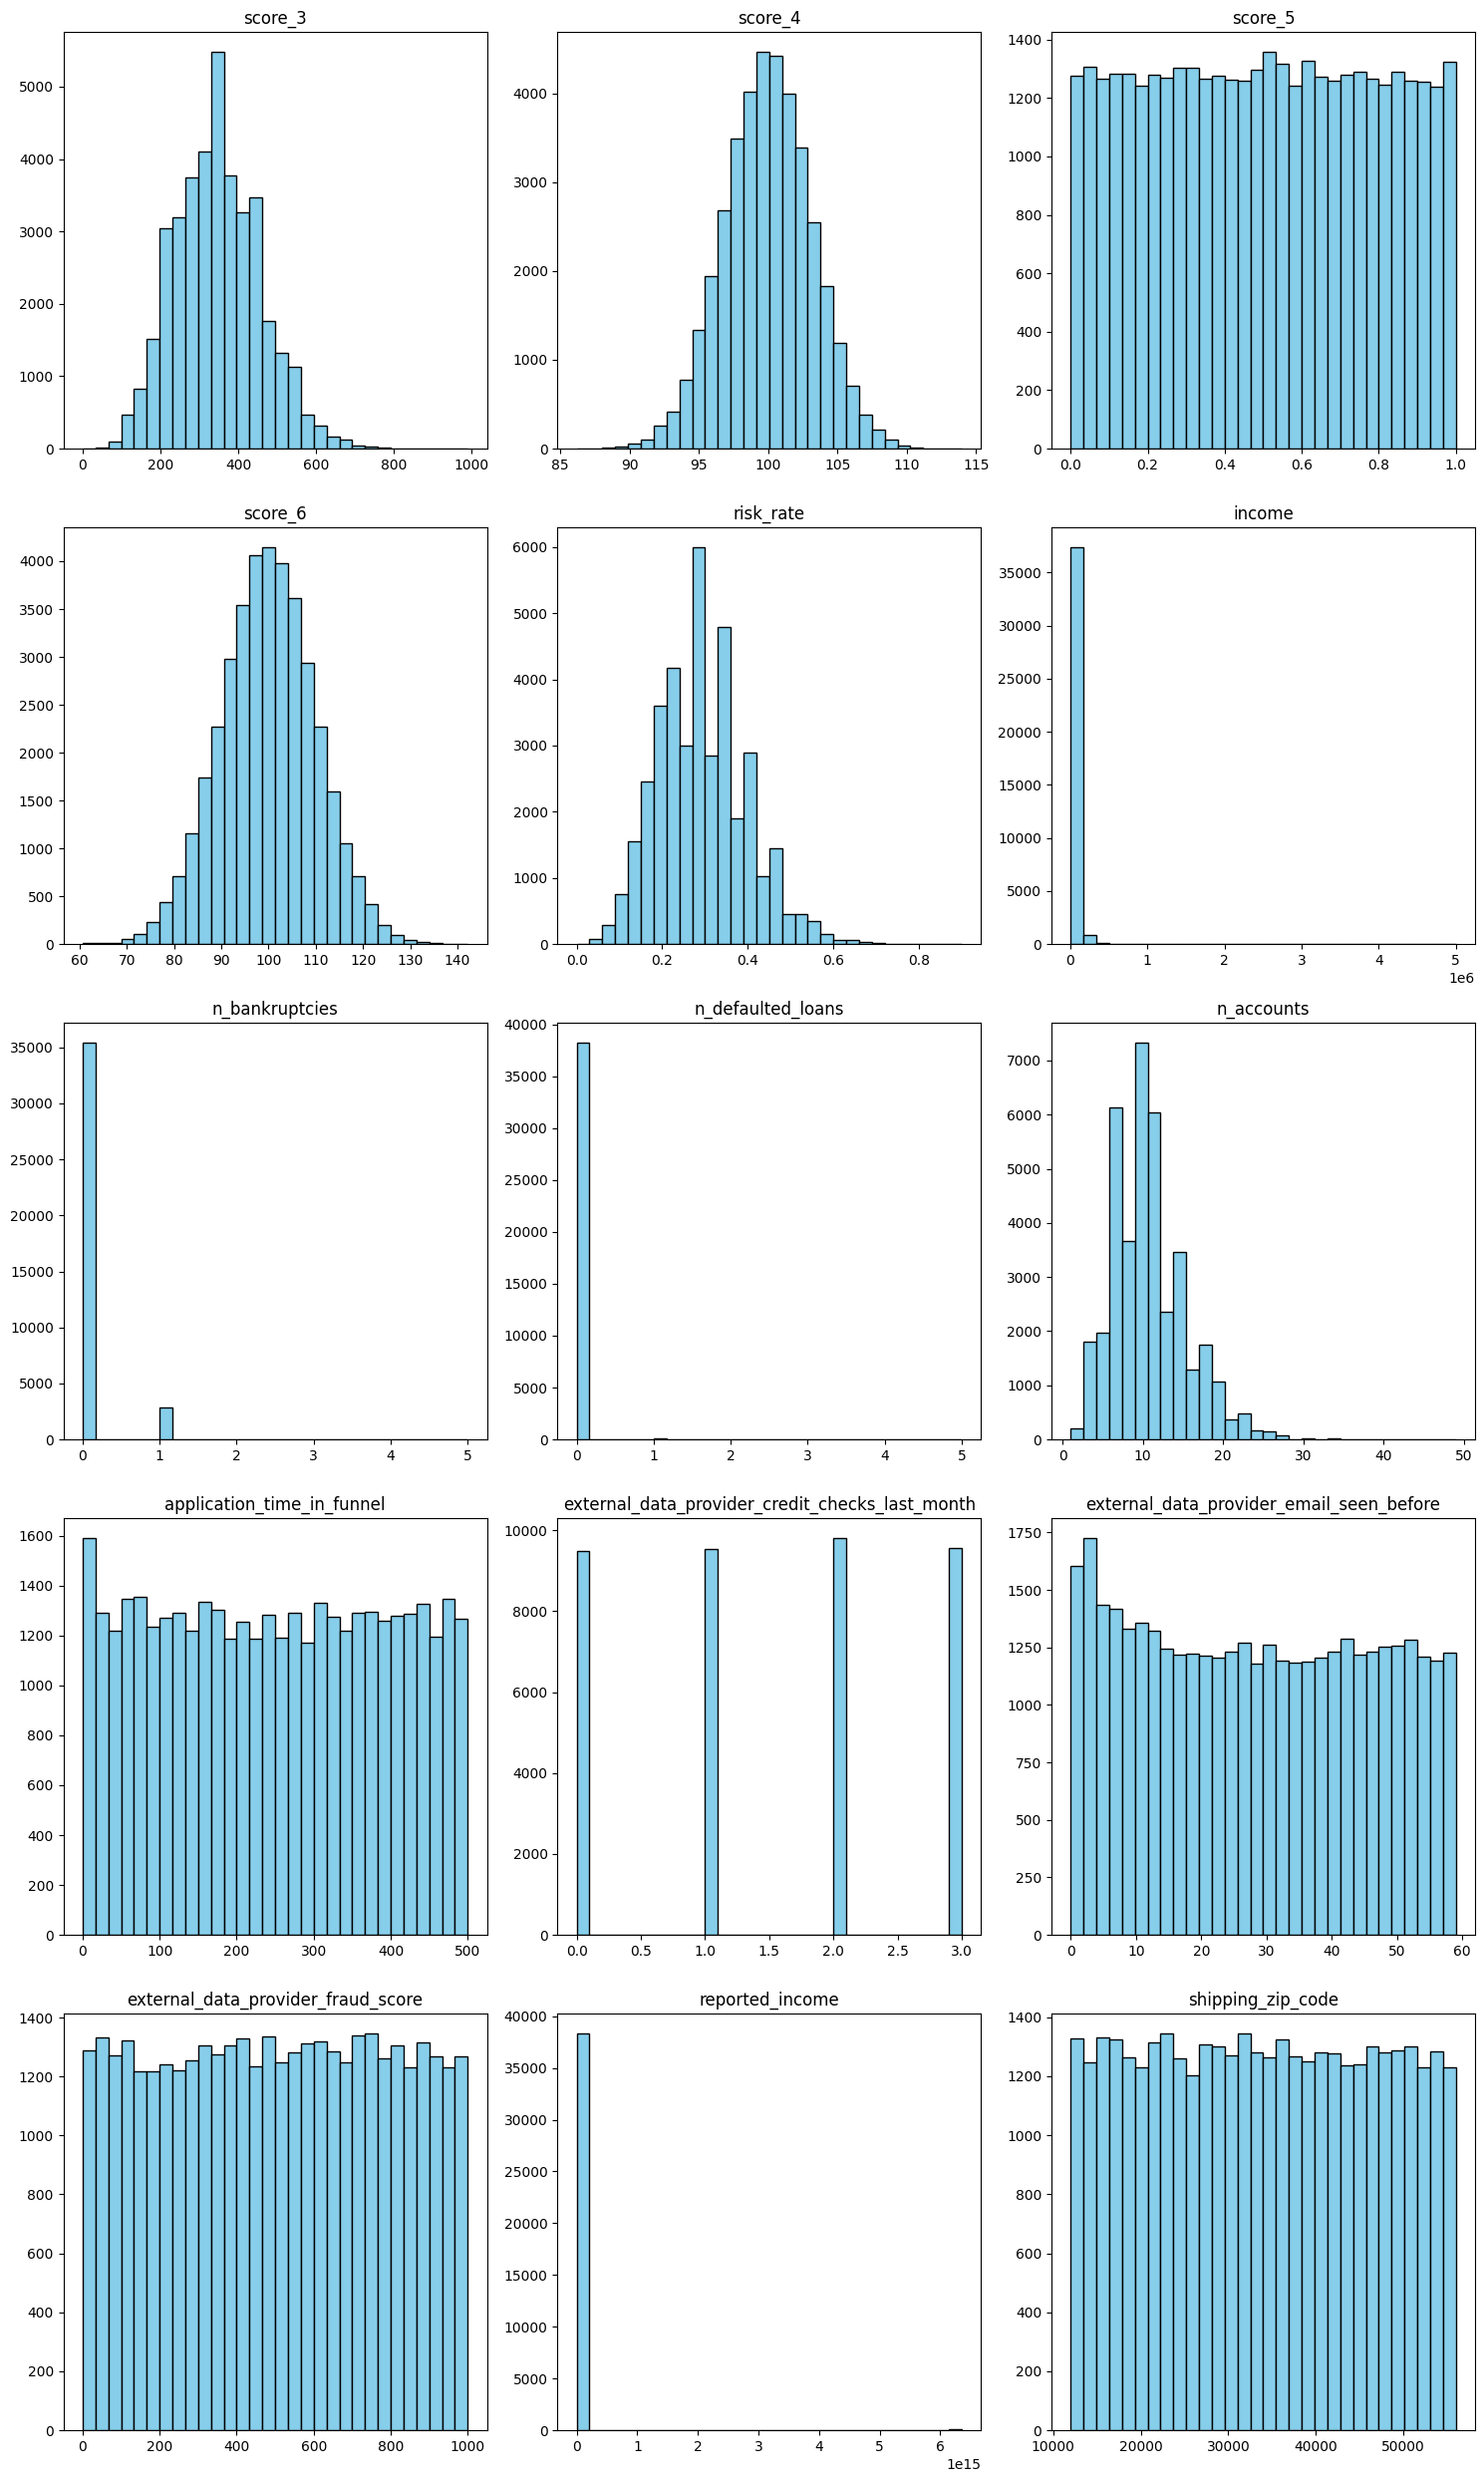

In [16]:
#Making the plots

#Calculating the number of rows needed 
total_variables = len(num_var)
if total_variables%3 == 0:
    rows = (total_variables // 3)
else:
    rows = (total_variables // 3) + 1
    
# Create subplots: one row per group of 3 plots
fig, axs = plt.subplots(rows, 3, figsize=(15, 5 * rows))

# If axs is a matrix (when there’s more than 1 row), flatten it into a 1D array for easier indexing
axs = axs.flatten()

# Loop through your numeric variables and create a histogram for each
for i, var in enumerate(num_var):
    axs[i].hist(df_clean[var], bins=30, color='skyblue', edgecolor='black')
    axs[i].set_title(f'{var}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

# Remove unused axes (if the total number of variables is not a multiple of 3)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


Insights:

- 🟡 As variáveis **score_5**, **application_time_in_funnel**, **external_data_provider_email_seen_before**, **external_data_provider_fraud_score** apresentam uma distribuição homogenea.

- 🟡 As variáveis **income** e **reported_income** parecem possuir possíveis outliers. Serão checados em uma etapa seguinte.

- 🔴 A variável **shipping_zip_code** indica um código postal, logo é uma variável categorica.

#### 🔃 Making necessary changes

In [17]:
df_clean['shipping_zip_code'] = df_clean['shipping_zip_code'].astype('object')

#### TO CHECK LIST 🔎

*   Verificar  impacto das variáveis **score_5**, **application_time_in_funnel**, **external_data_provider_email_seen_before**, **external_data_provider_fraud_score** no modelo de predição.

*   Checar outliers nas colunas  **income** e **reported_income**.

---

*   As variáveis **facebook_profile**,	**marketing_channel**,	**job_name**, **external_data_provider_email_seen_before**, **lat_lon**, **user_agent**, **n_bankruptcies**, **n_defaulted_loans** e **reason** terão os seus valores ausentes tratados, o método (exclusão, substituição pela média/mediana) será definido nas etapas seguites.

*   Colunas do tipo *object* que sofreram uma Anonimização parecem possuir chaves iguais, o que indica que são variáveis categoricas. 

*   **external_data_provider_first_name** possivelmente é um nome anonimizado, não serve para o estudo.	

*   **lat_lon**	se estiver correta pode servir para plotar mapas, junto com outras informações

### Categorical Variables - Descriptive statistics

In [18]:
df_clean.describe(include='object')

,target_default,score_1,score_2,reason,facebook_profile,state,zip,channel,job_name,real_state,application_time_applied,email,external_data_provider_first_name,lat_lon,marketing_channel,profile_phone_number,shipping_state,shipping_zip_code,profile_tags,user_agent
count,38405,38405,38405,38401,34562,38405,38405,38405,36011,38405,38405,38405,38405,37242,35351,38405,38405,38405,38405,37807
unique,2,7,35,13282,2,50,820,1,28331,5,31381,6,29284,20712,9,38405,25,25713,22680,297
top,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,False,xsd3ZdsI3356I3xMxZeiqQ==,3k2JCQ8Bp5oDwaI39ZJgHA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,03:47:15,gmail.com,cleopatra,"(-5.164423488858103, -37.356920426246845)",Website,296-8101743,BR-SP,52411,{'tags': ['pro+aty']},Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...
freq,32314,12972,3200,3740,21746,6544,493,38405,140,19051,5,19343,6,14,9355,1,5969,6,317,177


Insights:

- 🔴 As variáveis **reason**, **zip**, **job_name** e **profile_phone_number** apresentam muitas classes distintas e com uma frequência baixa, o que muito provavelmente não trazerá ganhos ao modelo e acarretarra em grande necessidade de poder computacional para o processamento.
- 🟡 A variável **profile_tags** é composta por várias tags(códigos) em cada coluna, esses valores podem ser melhor investigado.
- 🟡 A variável **shipping_zip_code** e **lat_lon** pode representar a posição geográfica dos clientes, porém de uma especificidade mais que necessário para esse projeto, a coluna **shipping_state** pode ser suficiente, separando os clientes por estado.
- 🟡 As variáveis **application_time_applied** representam, respectivamente, hora da aplicação e posição geográfica e podem ser utilizadas para outras análises.
- 🔴 A variável **channel** possui apenas uma categoria encriptografada, será excluída pois não tem valor para a predição.
- 🔴 A variável **external_data_provider_first_name** representa nomes pessoais dos clientes (modificados), sem valor para a modelagem.

#### HYPOTHESIS 4

É possível plotar um mapa com os clientes através das colunas **shipping_state**.... **shipping_zip_code** e **lat_lon** .

In [19]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
df_test=df.copy()
# Remove the 'BR-' prefix to keep only the state abbreviations (e.g., SP, RJ, RS)
df_test['uf'] = df_test['shipping_state'].str.replace('BR-', '')

# Count the number of customers per state
customers_per_state = df_test['uf'].value_counts().reset_index()
customers_per_state.columns = ['uf', 'customers']

# Create a choropleth map using Plotly
fig = px.choropleth(
    customers_per_state,
    locations='uf',  # Column with state abbreviations (e.g., SP, RJ)
    locationmode='geojson-id',  # Tells Plotly to match 'uf' with GeoJSON features
    color='customers',  # Column to determine color intensity
    color_continuous_scale=[
        [0.0, '#ffffff'],   
        [0.5, '#1f77b4'],  
        [1.0, '#000022']    
    ],
    scope='south america',  # Limits the map to South America
    geojson='https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson',
    featureidkey='properties.sigla',  # The key in GeoJSON that matches 'uf'
    #color_continuous_scale='Blues',  # Color scale for density
    title='Distribution of Potential Customers'
)

# Adjust map layout
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

# Show the interactive map
fig.show()

<p align="center">
<img width=95% src="https://raw.githubusercontent.com/gabrielcapela/credit_risk/main/images/distribution_brazil.png">
</p>

Insights:

- 🟡 Os estado de São Paulo, Goiás, Bahia e Amazonas se destacam, possuindo mais entradas.
- 🟡 Outros estados possuem uma quantidade semelhante de entradas, o que pode não fazer sentido, pois possuem áreas e densidades demográficas bem diferentes.
- 🟡 Ressalta-se que o dataset não tem nenhuma entrada para os estados do Rio de Janeiro e Piaui
- 🔴  As variáveis **shipping_zip_code** e **lat_lon** serão excluídas

#### HYPOTHESIS 5
As tags(códigos) que compoem a coluna em cada coluna **profile_tags** podem ser separadas e contadas. 

In [20]:
import ast  
# Convert the string to dict
df['profile_tags'] = df['profile_tags'].apply(ast.literal_eval)


# Extract all tag lists from the 'profile_tags' column
all_tags = df['profile_tags'].apply(lambda x: x['tags']).explode()

# Get unique tags
unique_tags = all_tags.unique()
print(f"Number of unique tags: {len(unique_tags)}")
print(f"Unique tags: {unique_tags}")

# Optional: count the frequency of each tag
tag_counts = all_tags.value_counts()
print(tag_counts)


Number of unique tags: 29
Unique tags: ['n19' 'n8' 'n6' 'n7' 'nim' 'n0' 'n17' 'da' 'n4' 'pro+aty' 'b19' 'c1' 'n3'
 'n9' 'n15' 'c55' 'n14' 'n2' 'n1' 'a15' 'n13' 'n18' 'aty' 'n12' 'n11'
 'dfa' 'n5' 'n16' 'n10']
profile_tags
a15        4989
b19        4956
da         4900
pro+aty    4894
dfa        4877
aty        4875
nim        4855
c55        4851
n10        4699
n16        4646
n1         4630
n11        4618
n0         4612
n8         4605
n14        4598
n18        4590
n17        4585
n6         4582
n15        4577
n19        4555
n3         4547
n9         4529
c1         4528
n4         4524
n2         4520
n5         4510
n7         4491
n13        4478
n12        4410
Name: count, dtype: int64


Insight:

- 🟡 A variável **profile_tags** poderá ser usada, após transformar cada tag em uma coluna binária (Multi-hot encoding).

#### HYPOTHESIS 6
A variável **application_time_applied** representa a hora da aplicação e pode ser utilizada na análise.

Invalid time entries: 2408


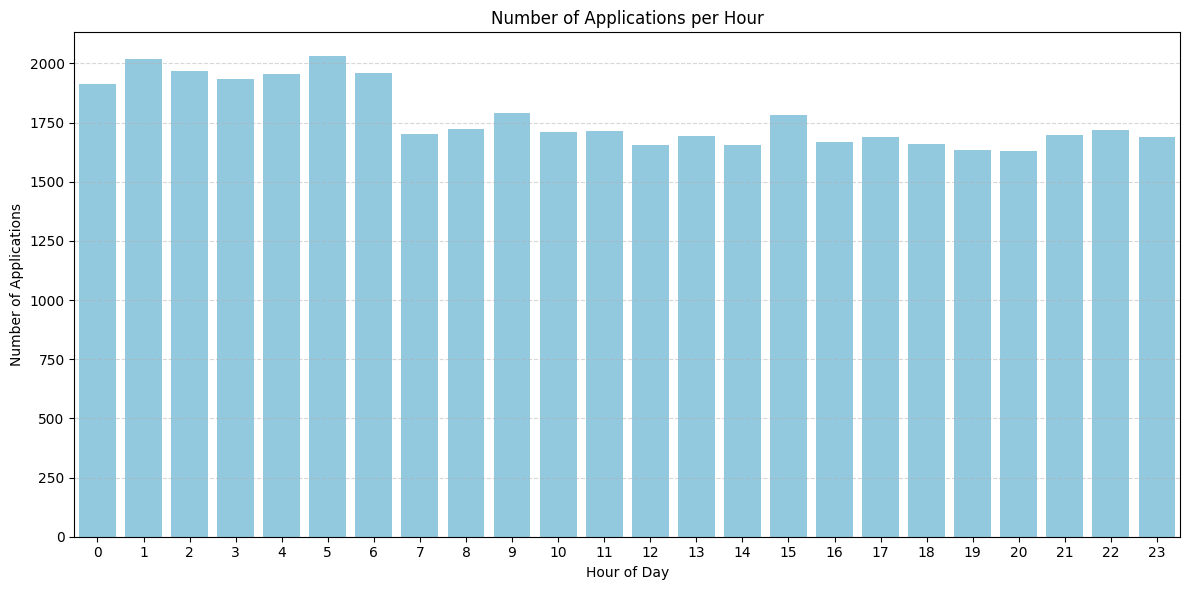

In [21]:

# Convert the 'time_applied' column from string to datetime format
df_test=df.copy()

# Try to convert, invalid times will become NaT
df_test['application_time_applied'] = pd.to_datetime(
    df_test['application_time_applied'], 
    format='%H:%M:%S', 
    errors='coerce'  # this avoids crashing on bad data
)

# Check how many invalid entries were found
invalid_times = df_test['application_time_applied'].isna().sum()
print(f"Invalid time entries: {invalid_times}")

# Optional: drop rows with invalid times
df_test = df_test.dropna(subset=['application_time_applied'])


# Extract the hour (0 to 23) from the datetime
df_test['application_time_applied'] = df_test['application_time_applied'].dt.hour

# Count the number of applications per hour
applications_per_hour = df_test['application_time_applied'].value_counts().sort_index()

# Plot the number of applications per hour
plt.figure(figsize=(12, 6))
sns.barplot(x=applications_per_hour.index, y=applications_per_hour.values, color='skyblue')
plt.title('Number of Applications per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Applications')
plt.xticks(range(0, 24))  # Show all 24 hours on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Insight:

- 🟡 **application_time_applied** As aplicações estão bem distribuídas ao longo do dia, o que pode tornar essa variável útil, é transformadar em classes de grupos de horários ( 00-06; 06-12;...).

#### Target variable

Vamos verificar o balanceamento das classes de nossa variável alvo:

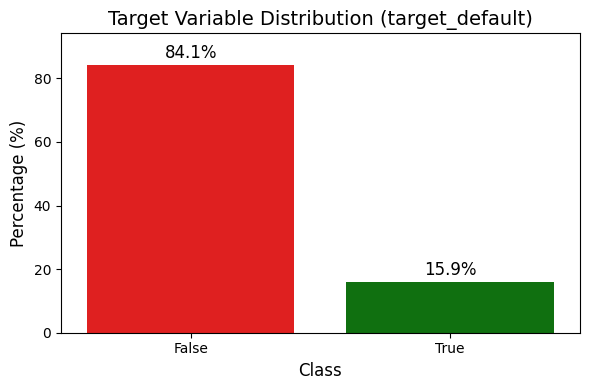

In [22]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

target_counts = df_clean['target_default'].value_counts(normalize=True) * 100
target_labels = target_counts.index

# Custom color palette: red for False, green for True
custom_colors = ['red' if label is False else 'green' for label in target_labels]
# Create the bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=target_labels, y=target_counts.values, palette=custom_colors)

# Add percentage labels on top of each bar
for i, val in enumerate(target_counts.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=12)

# Customize plot labels and appearance
plt.title('Target Variable Distribution (target_default)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, max(target_counts.values) + 10)

plt.tight_layout()
plt.show()


Insight:

- 🟡 Temo que nossa variável alvo é desbalanceada, apenas um pouco mais de 15% dos dados são de clientes inadimplentes. Será precisa balancear os dados antes do processo de modelagem.

#### 🚮 Making necessary exclusions

In [23]:
#Deleting categorical columns
df_clean = df_clean.drop(columns=['reason', 'zip', 'job_name', 'profile_phone_number', 'channel', 'external_data_provider_first_name', 'shipping_zip_code', 'lat_lon'])

In [24]:
print(f'The shape is {df_clean.shape[0]} x {df_clean.shape[1]}')
# df_clean.head()

The shape is 38405 x 26


#### TO CHECK LIST 🔎

*   Balanceamento dos dados ds variável alvo.
*   A variável **profile_tags** poderá ser usada, após transformar cada tag em uma coluna binária (Multi-hot encoding).
*   A variável **application_time_applied** está bem distribuída ao longo do dia, o que pode tornar essa variável útil, é transformadar em classes de grupos de horários ( 00-06; 06-12;...).
---

*   Verificar  impacto das variáveis **shipping_state**, **score_5**, **application_time_in_funnel**, **external_data_provider_email_seen_before**, **external_data_provider_fraud_score** no modelo de predição.

*   Checar outliers nas colunas  **income** e **reported_income**.

*   As variáveis **facebook_profile**,	**marketing_channel**, **external_data_provider_email_seen_before**, **user_agent**, **n_bankruptcies** e **n_defaulted_loans** terão os seus valores ausentes tratados, o método (exclusão, substituição pela média/mediana) será definido nas etapas seguites.



## Multivariate analysis

Verificando a correlação entre as variáveies numéricas através de uma matriz de correlação

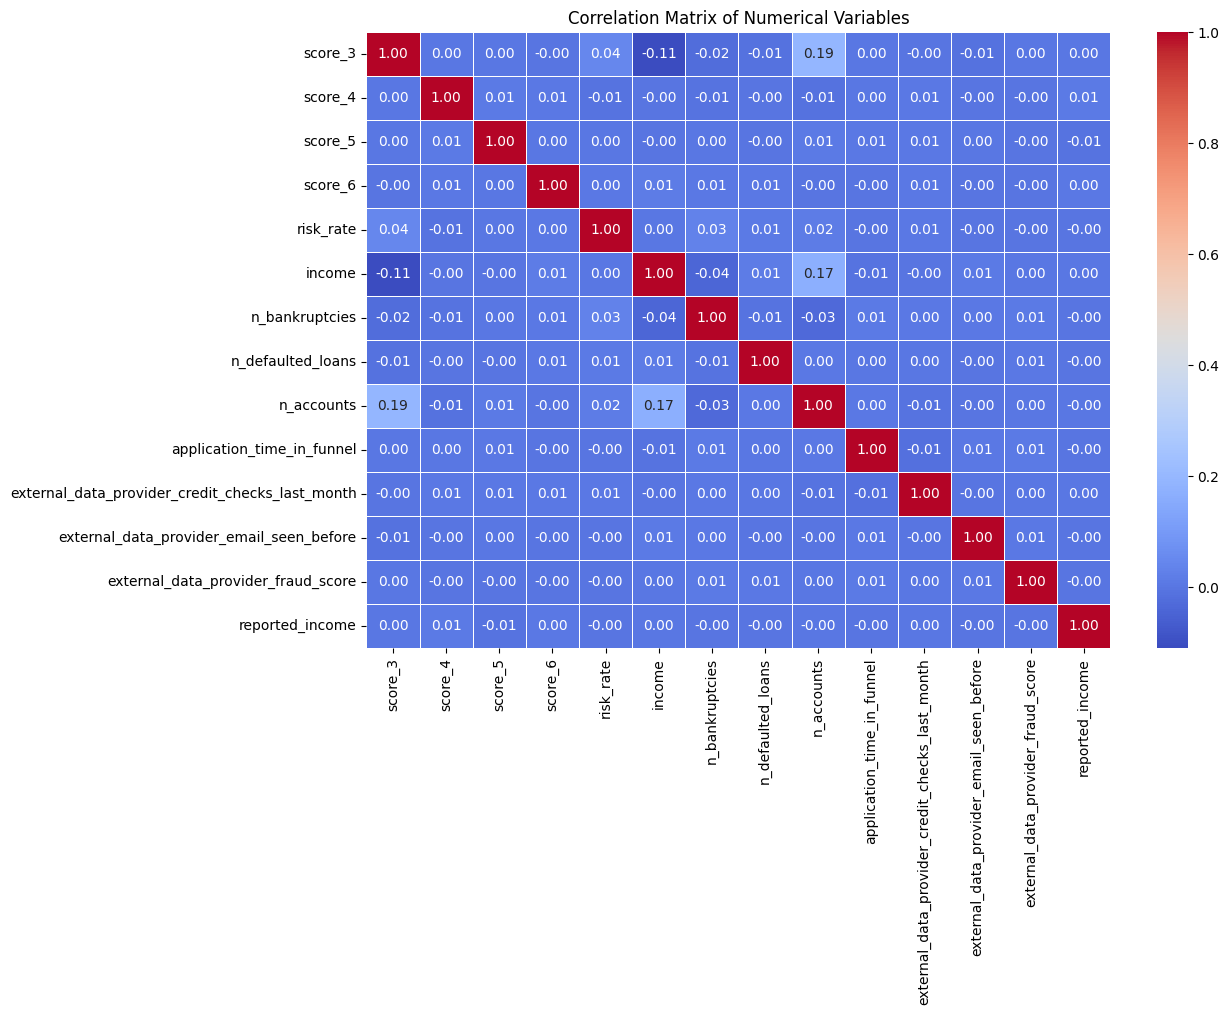

In [25]:
#Creating a list of numerical columns
numerical_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

#Ploting
corr_matrix = df_clean[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


- 🔵 As maiores correlações, considerando as variáveis que não serão excluidas, são entre **score_3**, **n_accounts** e  **income**, porém não apresentam um valor muito alto.

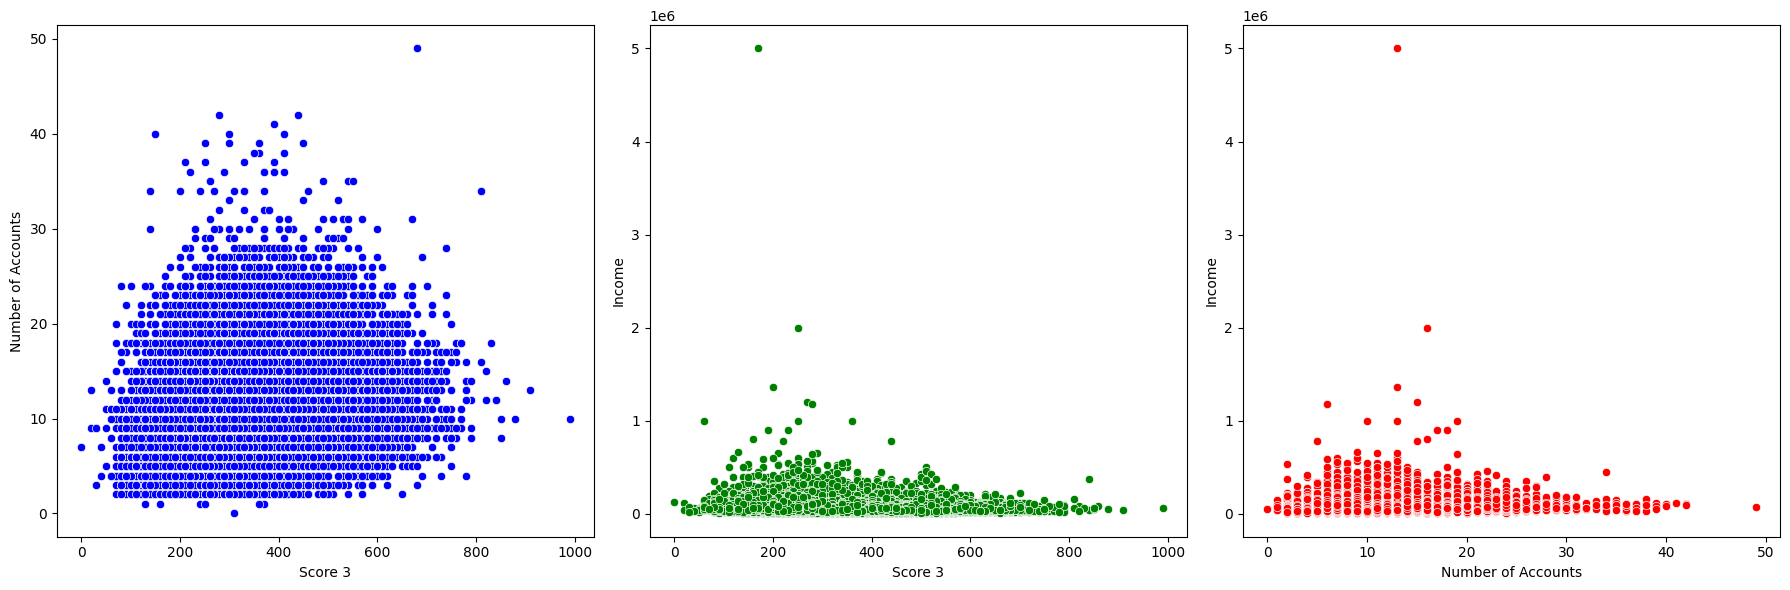

In [26]:
#Showing the correlation between these three variables

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# score_3 vs n_accounts
sns.scatterplot(x=df['score_3'], y=df['n_accounts'], ax=axes[0], color='blue')
axes[0].set_xlabel('Score 3')
axes[0].set_ylabel('Number of Accounts')
axes[0].set_title('')

# score_3 vs income
sns.scatterplot(x=df['score_3'], y=df['income'], ax=axes[1], color='green')
axes[1].set_xlabel('Score 3')
axes[1].set_ylabel('Income')
axes[1].set_title('')

# n_accounts vs income
sns.scatterplot(x=df['n_accounts'], y=df['income'], ax=axes[2], color='red')
axes[2].set_xlabel('Number of Accounts')
axes[2].set_ylabel('Income')
axes[2].set_title('')

plt.tight_layout()
plt.show()


## Outliers

To **search for outliers**, data from the numeric columns  will be checked.

The Z-score measures how many standard deviations a data point is from the mean.
It helps identify outliers by showing how extreme a value is within a distribution.

The **Z-Score method** will be used with a limit equal to 3.

In [27]:
import warnings
# Suppress all UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

# Select only numerical columns
numerical_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Copy the dataframe to preserve original
df_out = df_clean.copy()

# Dictionary to store outlier counts
outlier_counts = {}

# Loop through each numerical column
for column in numerical_columns:
    mean = df_clean[column].mean()
    std = df_clean[column].std()

    # Calculate Z-Score
    z_scores = (df_clean[column] - mean) / std

    # Count how many outliers there are in this column
    outliers = z_scores.abs() > 5
    count_outliers = outliers.sum()
    
    # Save to dictionary only if there are outliers
    if count_outliers > 0:
        outlier_counts[column] = count_outliers

    # Remove rows with outliers in this column
    df_out = df_out[~outliers]

# Print results
print("Columns with outliers and their counts:")
for col, count in outlier_counts.items():
    print(f"- {col}: {count} outliers")

# Overall data reduction
print(f"\n{(1 - df_out.shape[0] / df.shape[0]) * 100:.2f}% of the original data would be excluded")
print(f"{(1 - df_out.shape[0] / df_clean.shape[0]) * 100:.2f}% of the cleaned data would be excluded")


Columns with outliers and their counts:
- score_3: 2 outliers
- risk_rate: 2 outliers
- income: 115 outliers
- n_bankruptcies: 46 outliers
- n_defaulted_loans: 155 outliers
- n_accounts: 36 outliers
- reported_income: 66 outliers

15.59% of the original data would be excluded
1.09% of the cleaned data would be excluded


However, based on the analysis conducted so far, these variables appear to have a distribution consistent with reality — especially considering that some of the models to be used handle outliers well. Nevertheless, it's important to take a closer look at the **income** and **reported_income** variables.

In [28]:

# Showing the highest 67 values of 'reported_income'
df_clean[['reported_income']].nlargest(67, 'reported_income')

,reported_income
392,6.355500e+15
1238,6.355500e+15
1281,6.355500e+15
1766,6.355500e+15
3115,6.355500e+15
...,...
42832,6.355500e+15
43671,6.355500e+15
44088,6.355500e+15
44451,6.355500e+15


In [29]:
# Showing the highest 115 values of 'income'
df_clean[['income']].nlargest(100, 'income')

,income
29646,5000027.83
20164,2000018.20
18767,1362027.90
5012,1200025.56
31405,1176021.62
...,...
16409,351720.28
27654,350036.74
23052,350035.78
27673,350030.89


Insights:

- 🟡 A variável **income** possui um valor que se destaca, 5 milhões, porém pode estar representando um verdadeiro outlier, uma pessoa de alto renda. Esse tipo de outlier pode ser bem trabalhado cna fase de modelagem. O que procuramos aqui são erros de entradas.

- 🔴 A variável **reported_income** possui seus 66 valores mais altos idênticos e demasiadamente altos (6.35e+15), representando alguma inconsistência. Como se trata de apenas 66 linhas, essas serão deletadas.

#### 🚮 Making necessary exclusions

In [30]:
#Deleting the highest 67 values of 'reported_income'
df_clean = df_clean[df_clean['reported_income'] < 1000000000000000]

print(f'The shape is {df_clean.shape[0]} x {df_clean.shape[1]}')

The shape is 38339 x 26


#### TO CHECK LIST 🔎
*   Balanceamento dos dados ds variável alvo.

*   A variável **profile_tags** poderá ser usada, após transformar cada tag em uma coluna binária (Multi-hot encoding).

*   A variável **application_time_applied** está bem distribuída ao longo do dia, o que pode tornar essa variável útil, é transformadar em classes de grupos de horários ( 00-06; 06-12;...).

*   Verificar  impacto das variáveis **shipping_state**, **score_5**, **application_time_in_funnel**, **external_data_provider_email_seen_before**, **external_data_provider_fraud_score** no modelo de predição.

*   As variáveis **facebook_profile**,	**marketing_channel**, **external_data_provider_email_seen_before**, **user_agent**, **n_bankruptcies** e **n_defaulted_loans** terão os seus valores ausentes tratados, o método (exclusão, substituição pela média/mediana) será definido nas etapas seguites.

## Target vs Feature Relationship

### Numeric Variables -  Point-Biserial Correlation

The **Point-Biserial Correlation** measures the relationship between a binary variable and a continuous variable. It's a special case of the Pearson correlation, used to assess whether the mean of the continuous variable differs significantly between the two groups of the binary variable.

The correlation of the numerical variables with the target variable will be verified, as well as a new check for missing values.

In [31]:
import pandas as pd
from scipy.stats import pointbiserialr

# Create an empty list to store results
results = []

# Select only numerical columns
num_var = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Ensure all variables and the target are numeric
df_test = df_clean.copy()  # Create a copy for testing
df_test['target_default'] = pd.to_numeric(df_test['target_default'], errors='coerce')

# Loop through each numeric variable
for var in num_var:
    # Drop rows with missing values for the current variable and target
    temp_df = df_test[[var, 'target_default']].dropna()
    
    # Compute point-biserial correlation using aligned data
    coef, p_value = pointbiserialr(temp_df[var], temp_df['target_default'])
    
    # Check for missing values in the original dataframe
    n_missing = df_clean[var].isna().sum()
    perc_missing = (n_missing / len(df_clean)) * 100
    
    # Append results to the list
    results.append({
        'Variable': var,
        'Correlation Coefficient': round(coef, 4),
        'P-Value': round(p_value, 4),
        'Missing Values': n_missing,
        'Missing %': round(perc_missing, 2)
    })

# Create a DataFrame from the results list
correlation_df = pd.DataFrame(results)

# Display the table
correlation_df




,Variable,Correlation Coefficient,P-Value,Missing Values,Missing %
0,score_3,0.0474,0.0000,0,0.00
1,score_4,0.0050,0.3280,0,0.00
2,score_5,-0.0043,0.4033,0,0.00
3,score_6,0.0000,0.9985,0,0.00
4,risk_rate,0.0973,0.0000,0,0.00
5,income,-0.0434,0.0000,0,0.00
6,n_bankruptcies,0.0132,0.0099,119,0.31
7,n_defaulted_loans,0.0027,0.5916,9,0.02
8,n_accounts,0.0144,0.0047,0,0.00
9,application_time_in_funnel,-0.0206,0.0001,0,0.00


Insights:

*   🟡 Todos os coeficientes estão próximos de zero (entre -0.1 e 0.1), indicando correlações fracas com a variável alvo.
Isso não significa irrelevância automática, já que correlação linear não captura relações não lineares ou interações entre variáveis.


*   🟡 **score_3**, **risk_rate**, **income**, **application_time_in_funnel**, **n_accounts** e **n_bankruptcie**s têm p-valores pequenos, indicando que a relação com a variável alvo não ocorreu por acaso — mesmo que a força da relação seja fraca.

*   🟡 Variáveis com coeficiente de correlação muito baixo, provavelmente irrelevantes isoladamente: **score_4**, **score_5** **score_6**, **n_defaulted_loans**, **external_data_provider_credit_checks_last_month** **external_data_provider_fraud_score**, **reported_income** — todas com p-valores altos, sugerindo ausência de relação significativa com o target (p > 0.05).

*   🟡 As variáveis **n_bankruptcies** e **n_defaulted_loans** possuem alguns poucos valores ausentes, seu tratamento será definido na etapa de Data Preparation

#### TO CHECK LIST 🔎

*   Verificar o impacto das variáveis **score_4**, **score_5** **score_6**, **n_defaulted_loans**, **external_data_provider_credit_checks_last_month** **external_data_provider_fraud_score**, **reported_income** (correlação linear muito baixa e p-value alto)
---
*   Balanceamento dos dados da variável alvo.

*   A variável **profile_tags** poderá ser usada, após transformar cada tag em uma coluna binária (Multi-hot encoding).

*   A variável **application_time_applied** está bem distribuída ao longo do dia, o que pode tornar essa variável útil, é transformadar em classes de grupos de horários ( 00-06; 06-12;...).

*   Verificar  impacto das variáveis **shipping_state**, **score_5**, **application_time_in_funnel**, **external_data_provider_email_seen_before**, **external_data_provider_fraud_score** no modelo de predição.

*   As variáveis **facebook_profile**,	**marketing_channel**, **user_agent**, **n_bankruptcies** e **n_defaulted_loans**,  terão os seus valores ausentes tratados, o método (exclusão, substituição pela média/mediana) será definido nas etapas seguites.

### Categorical Variables - Chi-Square Test of Independence

**Chi-Square Test of Independence**
Esse teste avalia se a distribuição das categorias de uma variável está relacionada ou independente da variável de interesse.

O procedimento consiste em comparar os valores observados em uma tabela de contingência (frequências reais dos dados) com os valores esperados, que seriam esperados caso não houvesse relação entre as variáveis. Se a diferença entre os valores observados e esperados for estatisticamente significativa, rejeita-se a hipótese de independência — indicando uma possível associação entre a variável categórica analisada e a variável target_default.

O resultado do teste é avaliado por meio do valor-p (p-value):

Se o p-valor for menor que 0.05, rejeita-se a hipótese nula de independência. Isso indica que existe uma associação estatística significativa entre a variável categórica analisada (por exemplo, reason, job_name, zip, etc.) e a variável target_default.
Se o p-valor for maior que 0.05, não há evidência suficiente para afirmar que existe associação entre as variáveis. Nesse caso, considera-se que a variável analisada é independente da variável alvo.

Com base nesses resultados, é possível selecionar apenas as variáveis categóricas que apresentam associação significativa com target_default para etapas posteriores do processo de modelagem, como a criação de modelos preditivos ou análise de variáveis explicativas.

In [32]:
from scipy.stats import chi2_contingency

# Select only categorical columns
cat_var = df_clean.select_dtypes(include=['object']).columns.tolist()

# List to store the results
results = []

for col in cat_var:
    # Create a contingency table between the categorical variable and the target
    cont_table = pd.crosstab(df_clean[col], df_clean['target_default'])

    # Check if the table has at least 2 rows and 2 columns to perform the test
    if cont_table.shape[0] > 1 and cont_table.shape[1] > 1:
        # Perform the Chi-Square test
        stat, p, dof, expected = chi2_contingency(cont_table)

        # Count missing values
        missing_count = df_clean[col].isnull().sum()
        missing_pct = (missing_count / len(df_clean)) * 100

        # Append the results
        results.append({
            'Variable': col,
            'P-Value': round(p, 4),
            'Missing Count': missing_count,
            'Missing %': round(missing_pct, 2)
        })

# Display the results in a sorted table by P-Value
pd.DataFrame(results).sort_values(by='P-Value')




,Variable,P-Value,Missing Count,Missing %
0,target_default,0.0000,0,0.00
1,score_1,0.0000,0,0.00
2,score_2,0.0000,0,0.00
3,facebook_profile,0.0000,3834,10.00
4,state,0.0000,0,0.00
5,real_state,0.0000,0,0.00
7,email,0.0000,0,0.00
8,marketing_channel,0.0000,3051,7.96
11,user_agent,0.0000,597,1.56
9,shipping_state,0.0000,0,0.00



*   🔵 Todas as variáveis com p-valor = 0.0000 possuem uma forte associação estatística com a variável alvo. Isso indica que suas categorias têm distribuições significativamente diferentes entre clientes inadimplentes e adimplentes.
**score_1**, **score_2**: Altamente informativas, são provavelmente derivadas de crédito e essenciais para o modelo.
**facebook_profile**, **email**, **real_state**, **state**, **marketing_channel**, **shipping_state**, **user_agent**: Indicam que comportamento digital, localização e perfil de marketing influenciam fortemente o risco de inadimplência.

*   🟡 **profile_tags** e **application_time_applied** não apresentam um p-value baixo, porém elas sofrerão ainda o processo de Feature Engineering.

*   🟡 **facebook_profile** (10%) e **marketing_channel** (7.96%) possuem ausência considerável de dados, o que pode influenciar a análise.Para evitar mais exclusão de dados, será criada uma categoria '
desoconhecido' para essas variáveis, asssim como para **user_agent**.


#### TO CHECK LIST 🔎
*   Balanceamento dos dados ds variável alvo.

*   A variável **profile_tags** poderá ser usada, após transformar cada tag em uma coluna binária (Multi-hot encoding).

*   A variável **application_time_applied** está bem distribuída ao longo do dia, o que pode tornar essa variável útil, é transformadar em classes de grupos de horários ( 00-06; 06-12;...).

*   Verificar  impacto das variáveis **shipping_state**, **score_4**, **score_5**, **score_6**, **application_time_in_funnel**, **external_data_provider_email_seen_before**, **external_data_provider_fraud_score**, **external_data_provider_credit_checks_last_month**,  **reported_income**, **n_defaulted_loans** no modelo de predição.

*   As variáveis **facebook_profile**,	**marketing_channel**, **external_data_provider_email_seen_before**, **user_agent**, **n_bankruptcies** e **n_defaulted_loans**,  terão os seus valores ausentes tratados.

# Data Preparation

In this step, we will modify the data based on the insights gathered from the previous analysis. Next, feature engineering techniques will be applied to prepare the categorical data for modeling, converting it into discrete features. Finally, the data will be split into training and test sets for further analysis.

## Imputation of Missing Values

Checking for missing values ​​after deletions made in the previous step

In [33]:
import pandas as pd

# Calculating the missing values in df_clean
missing_values = df_clean.isnull().sum()
missing_percentage = (missing_values / len(df_clean)) * 100

# Creating a summary DataFrame
missing_data = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percentage})

# Displaying the summary of missing values
print("Missing Values in df_clean:")
print(missing_data)

# Calculating the percentage of rows and columns excluded
rows_excluded_percentage = (1 - df_clean.shape[0] / df.shape[0]) * 100
columns_excluded_percentage = (1 - df_clean.shape[1] / df.shape[1]) * 100

# Printing the final message
print(f"\n{rows_excluded_percentage:.2f}% of the rows have been excluded and {columns_excluded_percentage:.2f}% of the columns.")



Missing Values in df_clean:
                                                 Missing Count  Missing %
target_default                                               0   0.000000
score_1                                                      0   0.000000
score_2                                                      0   0.000000
score_3                                                      0   0.000000
score_4                                                      0   0.000000
score_5                                                      0   0.000000
score_6                                                      0   0.000000
risk_rate                                                    0   0.000000
income                                                       0   0.000000
facebook_profile                                          3834  10.000261
state                                                        0   0.000000
real_state                                                   0   0.000000
n_bankrupt

Temos que apenas 14.80% das linhas, sendo assim, vamos excluir também os valores ausentes nas variáveis numéricas **n_bankruptcies** e **n_defaulted_loans**, pois não representam nem 1% do dataset. No entanto, os valores ausentes das variáveis categoricas **facebook_profile**, **marketing_channel** e **user_agent** serão convertidos em uma categoria 'unknown'.

In [34]:
# Handling missing values in numeric variables
df_clean = df_clean.dropna(subset=['n_bankruptcies', 'n_defaulted_loans'])

# Handling missing values in categorical variables by replacing them with 'unknown'
df_clean['facebook_profile'] = df_clean['facebook_profile'].fillna('unknown')
df_clean['marketing_channel'] = df_clean['marketing_channel'].fillna('unknown')
df_clean['user_agent'] = df_clean['user_agent'].fillna('unknown')

# Calculate the percentage of rows removed
removed_rows = ((df.shape[0] - df_clean.shape[0]) / df.shape[0]) * 100


# Print the final sentence
print(f"{removed_rows:.2f}% of the rows have been excluded.")


15.07% of the rows have been excluded.


In [35]:
df_clean.head()
print(f"The data set has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns.")

The data set has 38220 rows and 26 columns.


#### TO CHECK LIST 🔎
*   Balanceamento dos dados ds variável alvo.

*   A variável **profile_tags** poderá ser usada, após transformar cada tag em uma coluna binária (Multi-hot encoding).

*   A variável **application_time_applied** está bem distribuída ao longo do dia, o que pode tornar essa variável útil, é transformadar em classes de grupos de horários ( 00-06; 06-12;...).

*   Verificar  impacto das variáveis **shipping_state**, **score_4**, **score_5**, **score_6**, **application_time_in_funnel**, **external_data_provider_email_seen_before**, **external_data_provider_fraud_score**, **external_data_provider_credit_checks_last_month**,  **reported_income**, **n_defaulted_loans** no modelo de predição.

## Feature Engineering

Numerical variables with up to 10 categories will be transformed using **One-Hot Encoding**, while those with more categories will be encoded using **Target Encoding**. The variables **application_time_applied** and **profile_tags** will be preprocessed separately before encoding is applied.

In [36]:
df_ft_eng = df_clean.copy()

### target_default

In [37]:
# Convert the target variable to integer (0 and 1)
df_ft_eng['target_default'] = df_ft_eng['target_default'].astype(int)


### profile_tags

Criando uma coluna binária para cada tag existente da coluna **profile_tags**

In [38]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

# Convert string representation of dictionaries to actual Python dicts
df_ft_eng['profile_tags'] = df_ft_eng['profile_tags'].apply(ast.literal_eval)

# Extract list of tags for each row
df_ft_eng['profile_tags'] = df_ft_eng['profile_tags'].apply(lambda x: x['tags'])

# Apply MultiLabelBinarizer to create multi-hot encoded columns
mlb = MultiLabelBinarizer()
tags_encoded = mlb.fit_transform(df_ft_eng['profile_tags'])

# Create a DataFrame with the new binary columns
tags_df = pd.DataFrame(tags_encoded, columns=[f"tag_{tag}" for tag in mlb.classes_], index=df_ft_eng.index)

# Concatenate the new columns with the original dataframe
df_ft_eng = pd.concat([df_ft_eng.drop(columns=['profile_tags']), tags_df], axis=1)

# Optional: check result
print(f"Multi-hot encoded tags: {tags_df.shape[1]} columns")
df_ft_eng.head()


Multi-hot encoded tags: 29 columns


,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,income,facebook_profile,state,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,user_agent,tag_a15,tag_aty,tag_b19,tag_c1,tag_c55,tag_da,tag_dfa,tag_n0,tag_n1,tag_n10,tag_n11,tag_n12,tag_n13,tag_n14,tag_n15,tag_n16,tag_n17,tag_n18,tag_n19,tag_n2,tag_n3,tag_n4,tag_n5,tag_n6,tag_n7,tag_n8,tag_n9,tag_nim,tag_pro+aty
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,07:52:34,444,outlook.com,2,51.0,645,Invite-email,57849.0,BR-MT,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,02:34:29,346,gmail.com,1,17.0,243,Radio-commercial,4902.0,BR-RS,Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,65023.65,unknown,Ygq6MsM98oC8yceExr69Ig==,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,00:60:02,6,gmail.com,2,9.0,65,Waiting-list,163679.0,BR-RR,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,11:20:49,406,spgov.com,3,38.0,815,Waiting-list,1086.0,BR-RN,Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,13:39:03,240,gmail.com,2,46.0,320,Invite-email,198618.0,BR-MT,Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


### application_time_applied

Os dados dessa coluna serão divididos em 4 categorias: 00-06, 06-12, 12-18 e 18-00

In [39]:
# Se a coluna for string, converte para datetime (só o horário)
df_ft_eng['application_time_applied'] = pd.to_datetime(df_ft_eng['application_time_applied'], format='%H:%M:%S', errors='coerce').dt.time

# Função para categorizar o horário
def categorize_hour(time_obj):
    if time_obj is None:
        return 'unknown'
    hour = time_obj.hour
    if 0 <= hour < 6:
        return '00-06'
    elif 6 <= hour < 12:
        return '06-12'
    elif 12 <= hour < 18:
        return '12-18'
    else:
        return '18-00'

# Aplica a função
df_ft_eng['application_time_category'] = df_ft_eng['application_time_applied'].apply(categorize_hour)
#Deleting columm
df_ft_eng = df_ft_eng.drop(columns=['application_time_applied'])
df_ft_eng.head()


,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,income,facebook_profile,state,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,user_agent,tag_a15,tag_aty,tag_b19,tag_c1,tag_c55,tag_da,tag_dfa,tag_n0,tag_n1,tag_n10,tag_n11,tag_n12,tag_n13,tag_n14,tag_n15,tag_n16,tag_n17,tag_n18,tag_n19,tag_n2,tag_n3,tag_n4,tag_n5,tag_n6,tag_n7,tag_n8,tag_n9,tag_nim,tag_pro+aty,application_time_category
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,444,outlook.com,2,51.0,645,Invite-email,57849.0,BR-MT,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,06-12
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,346,gmail.com,1,17.0,243,Radio-commercial,4902.0,BR-RS,Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,00-06
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,65023.65,unknown,Ygq6MsM98oC8yceExr69Ig==,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,6,gmail.com,2,9.0,65,Waiting-list,163679.0,BR-RR,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,18-00
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,406,spgov.com,3,38.0,815,Waiting-list,1086.0,BR-RN,Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,06-12
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,240,gmail.com,2,46.0,320,Invite-email,198618.0,BR-MT,Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12-18


### One Hot Encoding


One-Hot Encoding is a data preprocessing technique that **converts categorical variables into binary columns**, with each column representing a distinct category. This method is particularly useful when the variable has a limited number of categories, ensuring that each category is treated independently **without implying any order or relationship between them**.

In this case, we will apply One-Hot coding to variables that **have a maximum of 10 distinct categories**.

In [40]:
df_ft_eng.describe(include = 'object')

,score_1,score_2,facebook_profile,state,real_state,email,marketing_channel,shipping_state,user_agent,application_time_category
count,38220,38220,38220,38220,38220,38220,38220,38220,38220,38220
unique,7,35,3,49,5,6,10,25,298,4
top,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,False,xsd3ZdsI3356I3xMxZeiqQ==,N5/CE7lSkAfB04hVFFwllw==,gmail.com,Website,BR-SP,unknown,18-00
freq,12914,3191,21642,6523,18982,19249,9319,5937,595,10562


In [41]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns 
cat_cols = ['score_1', 'facebook_profile', 'real_state', 'email', 'marketing_channel', 'application_time_category']

# pply One-Hot Encoding only to the filtered categorical columns
df_ft_eng_encoded = pd.get_dummies(df_ft_eng, columns=cat_cols, dtype=int)
df_ft_eng_encoded.head()

,target_default,score_2,score_3,score_4,score_5,score_6,risk_rate,income,state,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state,user_agent,tag_a15,tag_aty,tag_b19,tag_c1,tag_c55,tag_da,tag_dfa,tag_n0,tag_n1,tag_n10,tag_n11,tag_n12,tag_n13,tag_n14,tag_n15,tag_n16,tag_n17,tag_n18,tag_n19,tag_n2,tag_n3,tag_n4,tag_n5,tag_n6,tag_n7,tag_n8,tag_n9,tag_nim,tag_pro+aty,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==,facebook_profile_False,facebook_profile_True,facebook_profile_unknown,real_state_+qWF9pJpVGtTFn4vFjb/cg==,real_state_N5/CE7lSkAfB04hVFFwllw==,real_state_UX7AdFYgQh+VrVC5eIaU9w==,real_state_n+xK9CfX0bCn77lClTWviw==,real_state_nSpvDsIsslUaX6GE6m6eQA==,email_gmail.com,email_gmaill.com,email_hotmail.com,email_hotmaill.com,email_outlook.com,email_spgov.com,marketing_channel_Facebook,marketing_channel_Instagram,marketing_channel_Invite-email,marketing_channel_Invite-web,marketing_channel_LinkedIn,marketing_channel_Radio-commercial,marketing_channel_Twitter,marketing_channel_Waiting-list,marketing_channel_Website,marketing_channel_unknown,application_time_category_00-06,application_time_category_06-12,application_time_category_12-18,application_time_category_18-00
0,0,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,65014.12,sjJbkqJS7cXalHLBFA+EOQ==,0.0,0.0,18.0,444,2,51.0,645,57849.0,BR-MT,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,100018.91,xsd3ZdsI3356I3xMxZeiqQ==,0.0,0.0,14.0,346,1,17.0,243,4902.0,BR-RS,Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,65023.65,Ygq6MsM98oC8yceExr69Ig==,0.0,0.0,10.0,6,2,9.0,65,163679.0,BR-RR,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,68830.01,KET/Pmr6rHp1RJ/P9ymztw==,1.0,0.0,19.0,406,3,38.0,815,1086.0,BR-RN,Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,60011.29,xsd3ZdsI3356I3xMxZeiqQ==,0.0,0.0,11.0,240,2,46.0,320,198618.0,BR-MT,Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [42]:
print(f"The data set has {df_ft_eng_encoded.shape[0]} rows and {df_ft_eng_encoded.shape[1]} columns.")

The data set has 38220 rows and 83 columns.


### Target Encoder

Target Encoding is a technique for encoding categorical variables, where **each category is replaced by the mean of the target (dependent variable) for that category**. This approach is useful when the categorical variable has many distinct categories and can be more efficient than One-Hot Encoding.

This technique will be used for the remaining categorical variables.

In [43]:
import category_encoders as ce

# Categorical columns to be target-encoded
cat_cols = ['score_2', 'state', 'shipping_state', 'user_agent']

target_encoder = ce.TargetEncoder(cols=cat_cols)
df_ft_eng_encoded[cat_cols] = target_encoder.fit_transform(df_ft_eng[cat_cols], df_ft_eng['target_default'])


In [44]:
df_ft_eng_encoded.head()

,target_default,score_2,score_3,score_4,score_5,score_6,risk_rate,income,state,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state,user_agent,tag_a15,tag_aty,tag_b19,tag_c1,tag_c55,tag_da,tag_dfa,tag_n0,tag_n1,tag_n10,tag_n11,tag_n12,tag_n13,tag_n14,tag_n15,tag_n16,tag_n17,tag_n18,tag_n19,tag_n2,tag_n3,tag_n4,tag_n5,tag_n6,tag_n7,tag_n8,tag_n9,tag_nim,tag_pro+aty,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==,facebook_profile_False,facebook_profile_True,facebook_profile_unknown,real_state_+qWF9pJpVGtTFn4vFjb/cg==,real_state_N5/CE7lSkAfB04hVFFwllw==,real_state_UX7AdFYgQh+VrVC5eIaU9w==,real_state_n+xK9CfX0bCn77lClTWviw==,real_state_nSpvDsIsslUaX6GE6m6eQA==,email_gmail.com,email_gmaill.com,email_hotmail.com,email_hotmaill.com,email_outlook.com,email_spgov.com,marketing_channel_Facebook,marketing_channel_Instagram,marketing_channel_Invite-email,marketing_channel_Invite-web,marketing_channel_LinkedIn,marketing_channel_Radio-commercial,marketing_channel_Twitter,marketing_channel_Waiting-list,marketing_channel_Website,marketing_channel_unknown,application_time_category_00-06,application_time_category_06-12,application_time_category_12-18,application_time_category_18-00
0,0,0.191796,350.0,101.800832,0.259555,108.427273,0.40,65014.12,0.135646,0.0,0.0,18.0,444,2,51.0,645,57849.0,0.157356,0.178571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0.131075,370.0,97.062615,0.942655,92.002546,0.24,100018.91,0.151311,0.0,0.0,14.0,346,1,17.0,243,4902.0,0.122944,0.217391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1,0.097752,360.0,100.027073,0.351918,112.892453,0.29,65023.65,0.154489,0.0,0.0,10.0,6,2,9.0,65,163679.0,0.219005,0.238710,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0.205692,510.0,101.599485,0.987673,94.902491,0.32,68830.01,0.131068,1.0,0.0,19.0,406,3,38.0,815,1086.0,0.146667,0.155039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0.253653,500.0,98.474289,0.532539,118.126207,0.18,60011.29,0.151311,0.0,0.0,11.0,240,2,46.0,320,198618.0,0.157356,0.251497,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [45]:
print(f"The data set has {df_ft_eng_encoded.shape[0]} rows and {df_ft_eng_encoded.shape[1]} columns.")

The data set has 38220 rows and 83 columns.


Pronto! Finalmente temos todas nossas colunas sendo numéricas.

#### TO CHECK LIST 🔎
*   Balanceamento dos dados da variável alvo.

*   Verificar  impacto das variáveis **shipping_state**, **score_4**, **score_5**, **score_6**, **application_time_in_funnel**, **external_data_provider_email_seen_before**, **external_data_provider_fraud_score**, **external_data_provider_credit_checks_last_month**,  **reported_income**, **n_defaulted_loans** no modelo de predição.

## Feature Scaling

**Standardization** is a preprocessing technique that transforms variables to have a mean of zero and a standard deviation of one. This is done by subtracting the mean from each variable and dividing by its standard deviation.

Standardization is crucial when variables have different scales or units, **as it ensures that no variable disproportionately influences the model**.

In this project, **we will apply standardization to the numerical variables**, as they have approximately normal distributions. This will help models like Logistic Regression and Support Vector Machines (SVM) perform better, **ensuring that all features contribute equally to the model's learning process**.

The standardization of numerical variables **will be performed within the pipeline** to be created in the model creation stage. The **StandardScaler** package from scikit-learn will be used for this purpose.

## Division of the dataset

In [46]:
#Importing the package needed for split
from sklearn.model_selection import train_test_split

#Dividing the dataset into features and targets
X = df_ft_eng_encoded.drop('target_default', axis=1)  # features
y = df_ft_eng_encoded['target_default']  # target

#Splitting into training set (70%) and test set (30%),
#the training set will be subdivided into a validation set during cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Checking the sizes of the divisions
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (26754, 82)
Testing set size: (11466, 82)


Exportando os dataset para o notebook seguinte:

In [47]:
# Exporta cada DataFrame como CSV
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [48]:
#Exportando os dados limpos para a etapa do Deployment
df_clean.to_csv("df_clean.csv", index=False)

## Data Balancing

In classification problems with **imbalanced classes—like in our case**, where the minority class (target_default = 1) represents **only 15.9%** of the data—it's crucial to apply techniques that help the model learn from both classes effectively.

**SMOTE** (Synthetic Minority Oversampling Technique) works by creating synthetic examples of the minority class, improving its representation in the dataset without simply duplicating existing rows.

**Undersampling**, on the other hand, reduces the number of observations in the majority class to achieve a better balance.

Both SMOTE and undersampling will be applied during the modeling phase, as part of the pipeline, to ensure the model is trained on balanced data and can generalize better.

### TO CHECK LIST 🔎

*   Verificar  impacto das variáveis **shipping_state**, **score_4**, **score_5**, **score_6**, **application_time_in_funnel**, **external_data_provider_email_seen_before**, **external_data_provider_fraud_score**, **external_data_provider_credit_checks_last_month**,  **reported_income**, **n_defaulted_loans** no modelo de predição.